
## Student Number : 221834178 Surname And Initials : Mawelela SS

## E-Commerce Customer Purchase Prediction Project 
Project Overview 
This project challenges students to predict customer purchasing behaviour using an e-commerce dataset. 
Students will determine whether a customer will make a purchase (binary classification) based on their browsing 
behaviour, demographics, and session characteristics. This follows the same structured approach as your Adult 
Income dataset assignment but with a retail/e-commerce focus. 

## 1.1 Library Imports (3 marks) 

In [ ]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.ticker as mtick  
from pandas.api.types import CategoricalDtype

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix   
import time

In [6]:
df = pd.read_csv("online_shoppers_intention.csv")

In [7]:
df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [8]:
df.shape

(12330, 18)

## 1.3 Data Exploration (5 marks) 

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [11]:
# Checking nulls

df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

<b> Comment: There are no null column as you can see all the columns sum of nulls is 0 </b>

- Show unique values for categorical columns 

In [12]:
categorical_columns = []
for col in df.columns:
    
    if df[col].dtype == 'object' or df[col].dtype == 'bool': # If column type is 'object' or 'bool', it's categorical
        categorical_columns.append(col)
        

# Show unique values for each categorical column
for col in categorical_columns:
    print(f"\nColumn: {col}")
    print(df[col].unique())        


Column: Month
['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']

Column: VisitorType
['Returning_Visitor' 'New_Visitor' 'Other']

Column: Weekend
[False  True]

Column: Revenue
[False  True]


## 1.4 Data Preprocessing (8 marks) 

In [13]:
le = LabelEncoder()


# Encode categorical variables
df['Month'] = le.fit_transform(df['Month'])
df['VisitorType'] = le.fit_transform(df['VisitorType'])
df['Weekend'] = le.fit_transform(df['Weekend'])

df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2,1,1,1,1,2,0,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,2,2,2,1,2,2,0,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2,4,1,9,3,2,0,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,2,3,2,2,4,2,0,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,2,3,3,1,4,2,1,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,2,2,2,1,3,2,0,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,2,2,4,3,3,2,0,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,2,1,2,1,5,2,1,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,2,2,2,2,3,2,0,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,2,2,4,1,2,2,0,False


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int32  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [15]:
# Normalize numerical features
numerical_columns = df.select_dtypes(include=[float, int]).columns
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


df['Revenue'] = df['Revenue'].apply(lambda x: 1 if x == True else 0)
print(df["Revenue"].unique())

[0 1]


## Day 2: Exploratory Data Analysis (20 marks) 

#### 2.1 Distribution Analysis (5 marks)

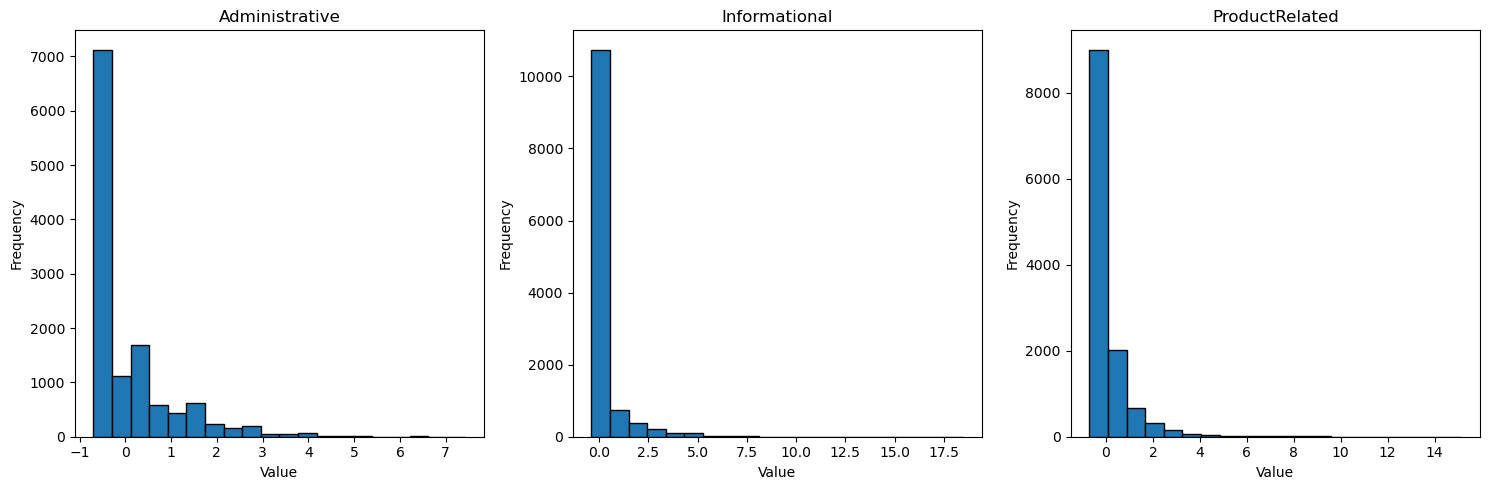

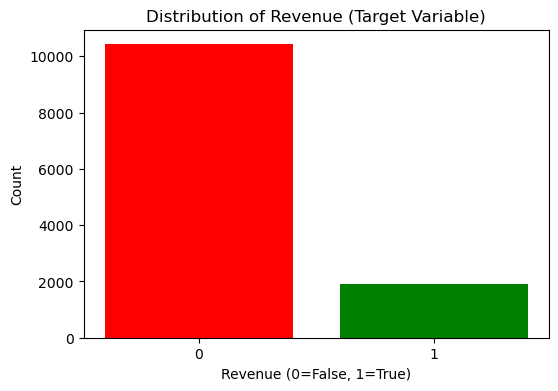

In [16]:
## 2.1 Distribution Analysis (5 marks)
# Create histograms for key numerical features
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(df['Administrative'], bins=20, edgecolor='black')
plt.title('Administrative')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['Informational'], bins=20, edgecolor='black')
plt.title('Informational')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df['ProductRelated'], bins=20, edgecolor='black')
plt.title('ProductRelated')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Show distribution of target variable (Revenue) using bar chart
revenue_counts = df['Revenue'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(revenue_counts.index.astype(str), revenue_counts.values, color=['red', 'green'])
plt.title('Distribution of Revenue (Target Variable)')
plt.xlabel('Revenue (0=False, 1=True)')
plt.ylabel('Count')
plt.xticks([0, 1])
plt.show()


#### 2.2 Correlation Analysis (5 marks) 

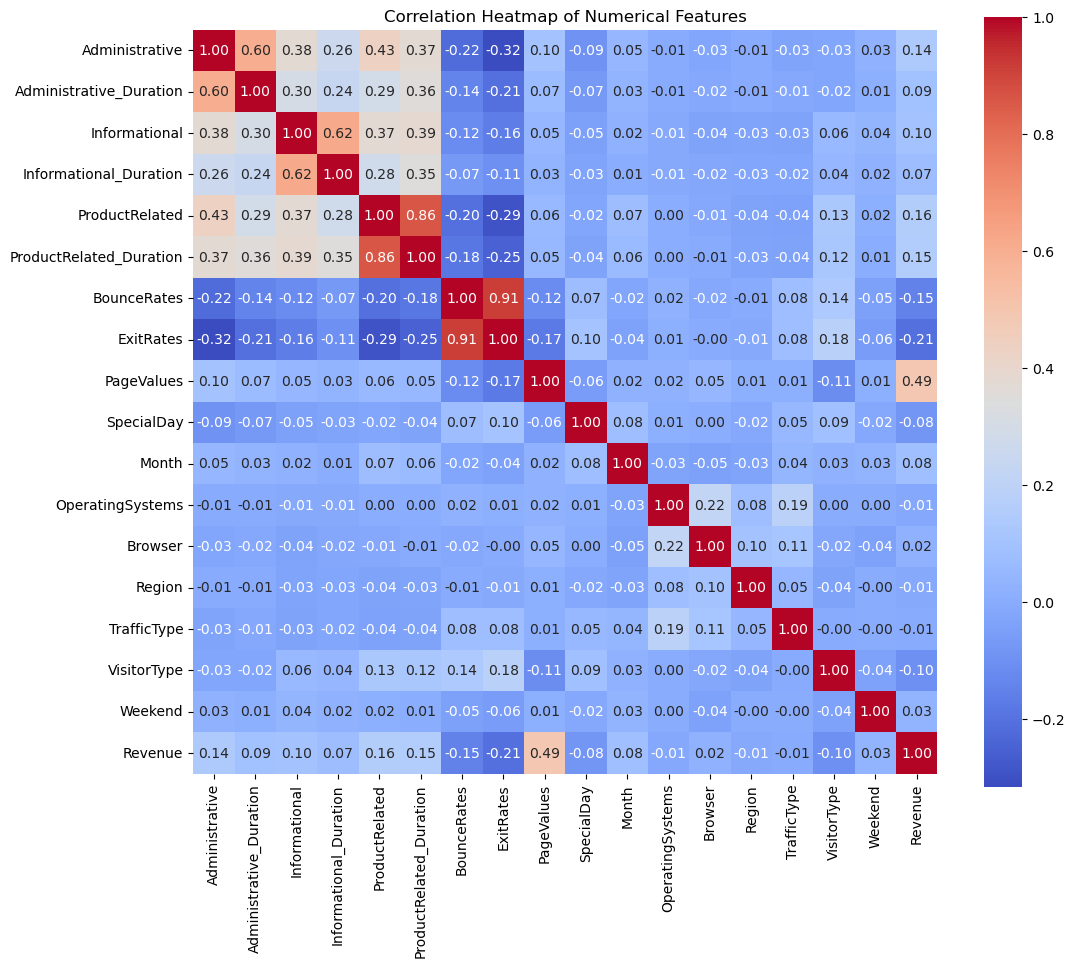

Correlations with Revenue:

Revenue                    1.000000
PageValues                 0.492569
ProductRelated             0.158538
ProductRelated_Duration    0.152373
Administrative             0.138917
Informational              0.095200
Administrative_Duration    0.093587
Month                      0.080150
Informational_Duration     0.070345
Weekend                    0.029295
Browser                    0.023984
TrafficType               -0.005113
Region                    -0.011595
OperatingSystems          -0.014668
SpecialDay                -0.082305
VisitorType               -0.104726
BounceRates               -0.150673
ExitRates                 -0.207071
Name: Revenue, dtype: float64


In [17]:
# Compute correlation matrix for numerical features
correlation_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Identify strongest correlations with the target variable 'Revenue'
# Sort correlations with Revenue in descending order
revenue_correlations = correlation_matrix['Revenue'].sort_values(ascending=False)
print("Correlations with Revenue:\n")
print(revenue_correlations)

#### 2.3 Outlier Detection (5 marks)

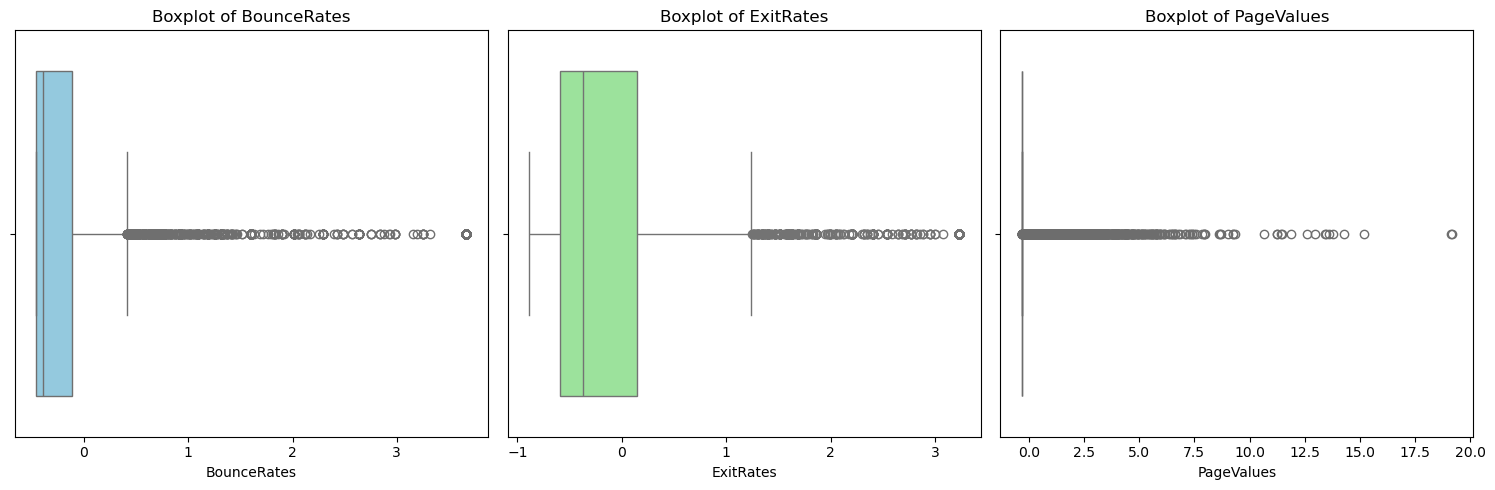

In [18]:
plt.figure(figsize=(15, 5))  

# Boxplot for BounceRates
plt.subplot(1, 3, 1)  # First subplot in a 1-row, 3-column layout
sns.boxplot(x=df['BounceRates'], color='skyblue')
plt.title('Boxplot of BounceRates')  

# Boxplot for ExitRates
plt.subplot(1, 3, 2)  
sns.boxplot(x=df['ExitRates'], color='lightgreen') 
plt.title('Boxplot of ExitRates')

# Boxplot for PageValues
plt.subplot(1, 3, 3)  
sns.boxplot(x=df['PageValues'], color='salmon') 
plt.title('Boxplot of PageValues')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display all three boxplots

In [19]:
#IQR (Interquartile Range) method to detect outliers numerically.
# This method flags values that fall far below or above the typical range.

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = data[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower threshold for outliers
    upper_bound = Q3 + 1.5 * IQR  # Upper threshold for outliers

    # Return rows where the column value is outside the IQR bounds
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Apply the function to each feature of interest
bounce_outliers = detect_outliers_iqr(df, 'BounceRates')  # Outliers in BounceRates
exit_outliers = detect_outliers_iqr(df, 'ExitRates')  # Outliers in ExitRates
pagevalue_outliers = detect_outliers_iqr(df, 'PageValues')  # Outliers in PageValues

# Print how many outliers were found in each feature
print(f"BounceRates outliers: {len(bounce_outliers)}")
print(f"ExitRates outliers: {len(exit_outliers)}")
print(f"PageValues outliers: {len(pagevalue_outliers)}")

BounceRates outliers: 1551
ExitRates outliers: 1099
PageValues outliers: 2730


In [20]:
#  OUTLIER DETECTION AND HANDLING

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile
    Q3 = data[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower threshold
    upper_bound = Q3 + 1.5 * IQR  # Upper threshold

    # Keep only rows within the bounds
    cleaned_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return cleaned_data

# Remove outliers from each feature one by one
df = remove_outliers_iqr(df, 'BounceRates')
df = remove_outliers_iqr(df, 'ExitRates')
df = remove_outliers_iqr(df, 'PageValues')

# Let's check the new shape of the dataset after removing outliers
print("Shape after outlier removal:", df.shape)

Shape after outlier removal: (7977, 18)


#####                                Documenting outlier handling strategy 

I used the Interquartile Range (IQR) method to detect outliers. This technique flags values that fall significantly below or above the typical range:
- Outliers are defined as values below Q1 - 1.5 \times IQR or above Q3 + 1.5 \times IQR.
- I applied this method individually to each of the three features.
Handling Strategy:
After identifying the outliers, I chose to remove them from the dataset. This decision was based on the following considerations:
- These extreme values could distort the learning process, especially for models sensitive to feature distribution like Logistic Regression and SVM.
- Removing outliers helps reduce noise and improves the reliability of statistical analysis and model performance.
- While some outliers may represent meaningful behavior, the majority were far outside the normal range and unlikely to generalize well.


## 2.4 Categorical Analysis (5 marks) 

##### Show purchase rate by Month using grouped bar charts 

C:\Users\sibus\AppData\Local\Temp\ipykernel_15956\3663494130.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_purchase_rate = df.groupby('month_in_words')['Revenue'].mean()
C:\Users\sibus\AppData\Local\Temp\ipykernel_15956\3663494130.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_purchase_rate.index, y=monthly_purchase_rate.values, palette='viridis')


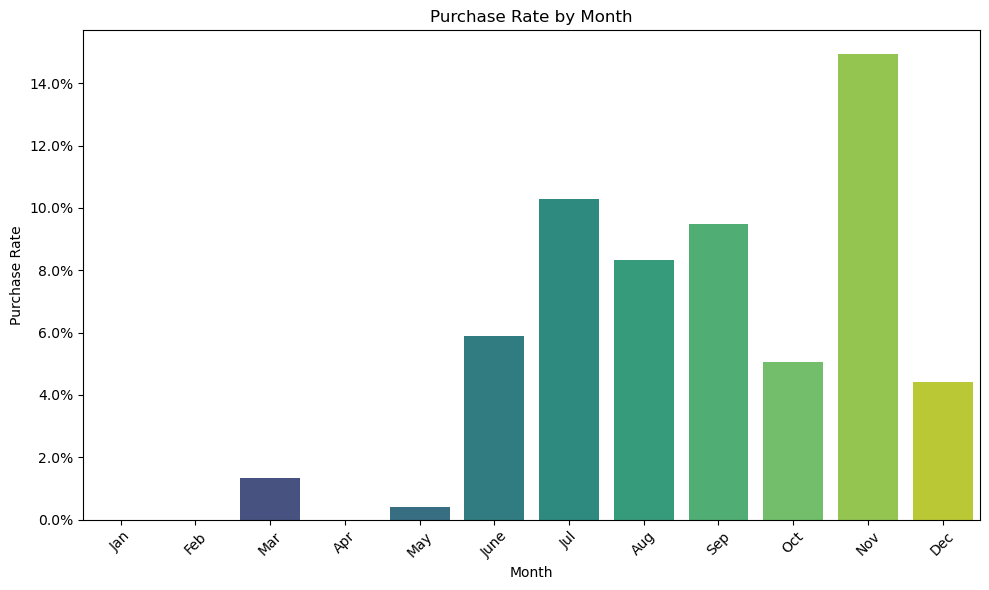

In [21]:
# =========Reloaded raw dataset to get original Month valuein wordss==================
original_df = pd.read_csv("online_shoppers_intention.csv")
df['month_in_words'] = original_df['Month']

#=========================calculate purchase rate by MonthRaw=================================

# Defining the correct calendar order for months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_type = CategoricalDtype(categories=month_order, ordered=True)

# Applying the order to the Month column
df['month_in_words'] = df['month_in_words'].astype(month_type)

# Now group and plot purchase rate by Month in correct order
monthly_purchase_rate = df.groupby('month_in_words')['Revenue'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_purchase_rate.index, y=monthly_purchase_rate.values, palette='viridis')
plt.title('Purchase Rate by Month')
plt.xlabel('Month')
plt.ylabel('Purchase Rate')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




#####  Analyze purchase behavior by VisitorType (New vs Returning) 

C:\Users\sibus\AppData\Local\Temp\ipykernel_15956\1979730320.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=visitor_purchase_rate.index, y=visitor_purchase_rate.values, palette='coolwarm')


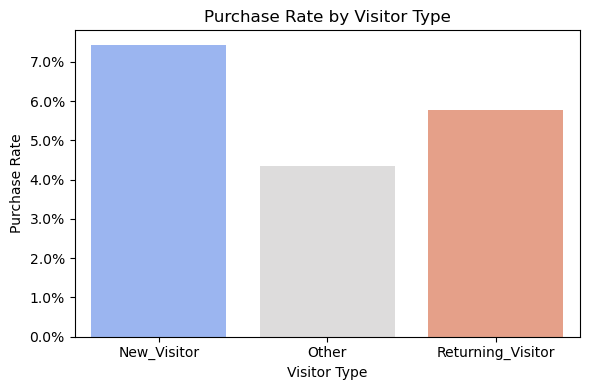

In [22]:

# =========Reloaded raw dataset to get original VisitorType value and Merge original VisitorType into normalized df========
df['VisitorTypeLabel'] = original_df['VisitorType']

# ==================================Calculate purchase rate by VisitorType===================================
visitor_purchase_rate = df.groupby('VisitorTypeLabel')['Revenue'].mean()

plt.figure(figsize=(6, 4))
sns.barplot(x=visitor_purchase_rate.index, y=visitor_purchase_rate.values, palette='coolwarm')
plt.title('Purchase Rate by Visitor Type')
plt.xlabel('Visitor Type')
plt.ylabel('Purchase Rate')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  # Format as percentage
plt.tight_layout()
plt.show()


##### Weekend vs Weekday purchase patterns 

C:\Users\sibus\AppData\Local\Temp\ipykernel_15956\901829763.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Weekday', 'Weekend'], y=weekend_purchase_rate.values, palette='Set2')


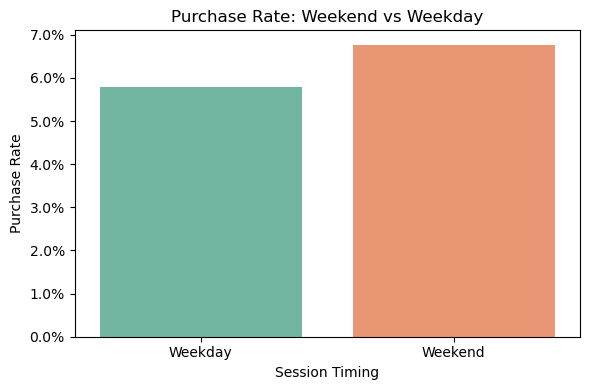

In [23]:
# get the original Weekend values and store it to the WeekendLabel and merge it to the normalized df 
df['WeekendLabel'] = original_df['Weekend']

#Calculates purchase rate for Weekend vs Weekday
weekend_purchase_rate = df.groupby('WeekendLabel')['Revenue'].mean()


# Plot grouped bar chart for Weekend vs Weekday purchase rates
plt.figure(figsize=(6, 4))
sns.barplot(x=['Weekday', 'Weekend'], y=weekend_purchase_rate.values, palette='Set2')
plt.title('Purchase Rate: Weekend vs Weekday')
plt.xlabel('Session Timing')
plt.ylabel('Purchase Rate')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  # Format y-axis as percentage
plt.tight_layout()
plt.show()

# Day 3: Feature Engineering (15 marks) 

### 3.1 Feature Selection (5 marks) 

<b>- Remove highly correlated features (correlation > 0.8) </b>

In [24]:
#catch both strong positive and negative correlations
correlation_matrix = correlation_matrix.abs()

#Create an upper triangle mask to avoid duplicate pairs and self-correlation
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Step 3: Find features with correlation > 0.8
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]

# Step 4: Drop those features from the dataset
df.drop(columns=high_corr_features, inplace=True)

# Step 5: Print the removed features
print("Removed highly correlated features (correlation > 0.8):")
print(high_corr_features)

Removed highly correlated features (correlation > 0.8):
['ProductRelated_Duration', 'ExitRates']


In [25]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,month_in_words,VisitorTypeLabel,WeekendLabel
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.045196,-0.317178,-0.308821,-1.334959,0.961270,0.374389,-0.894178,-0.017289,0.407786,1.816360,0,Feb,Returning_Visitor,True
5,-0.696993,-0.457191,-0.396478,-0.244931,-0.286270,-0.132035,-0.317178,-0.308821,-1.334959,-0.136078,-0.207952,-0.894178,-0.265735,0.407786,-0.550552,0,Feb,Returning_Visitor,False
9,-0.696993,-0.457191,-0.396478,-0.244931,-0.646033,-0.457683,-0.317178,1.702146,-1.334959,-0.136078,0.956730,-0.894178,-0.514182,0.407786,-0.550552,0,Feb,Returning_Visitor,False
10,-0.696993,-0.457191,-0.396478,-0.244931,-0.646033,-0.457683,-0.317178,-0.308821,-1.334959,-1.233426,-0.790293,-0.061364,-0.265735,0.407786,-0.550552,0,Feb,Returning_Visitor,False
11,-0.696993,-0.457191,-0.396478,-0.244931,-0.353725,-0.070976,-0.317178,1.702146,-1.334959,-1.233426,-0.790293,0.355044,-0.265735,0.407786,-0.550552,0,Feb,Returning_Visitor,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12323,-0.094882,-0.090900,-0.396478,-0.244931,0.275860,-0.457683,-0.317178,-0.308821,0.774654,-0.136078,-0.207952,-0.894178,1.473393,0.407786,-0.550552,0,Nov,Returning_Visitor,False
12324,-0.696993,-0.457191,0.390859,-0.244931,-0.353725,-0.457683,-0.317178,-0.308821,0.774654,-0.136078,-0.207952,-0.894178,-0.762629,0.407786,-0.550552,0,Nov,Returning_Visitor,False
12326,-0.696993,-0.457191,-0.396478,-0.244931,-0.601062,-0.457683,-0.317178,-0.308821,0.774654,0.961270,-0.207952,-0.894178,0.976499,0.407786,1.816360,0,Nov,Returning_Visitor,True
12328,0.507228,-0.032916,-0.396478,-0.244931,-0.376210,-0.457683,-0.317178,-0.308821,0.774654,-0.136078,-0.207952,-0.061364,1.721839,0.407786,-0.550552,0,Nov,Returning_Visitor,False


<b>- Drop irrelevant features based on domain knowledge </b>

 - TrafficType : often noisy and inconsistent across sessions
 - Browser: too granular and not strongly linked to purchasing behavior
 - Region: may not generalize well unless location-specific targeting is involved
 - OperatingSystems : rarely influences purchase decisions directly

 <b><i> So these features are typically considered weak predictors of purchase, so im going to drop them instead <i></b>

In [26]:
df.drop(columns=['TrafficType', 'Browser', 'Region', 'OperatingSystems'], inplace=True)

df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'BounceRates', 'PageValues',
       'SpecialDay', 'Month', 'VisitorType', 'Weekend', 'Revenue',
       'month_in_words', 'VisitorTypeLabel', 'WeekendLabel'],
      dtype='object')

### 3.2 Feature Creation (5 marks) 

<b>- Create new feature: TotalPages = Administrative + Informational + ProductRelated </b>

In [27]:
df['TotalPages'] = df['Administrative'] + df['Informational'] + df['ProductRelated']

df['TotalPages'].head()

4    -1.582107
5    -1.379740
9    -1.739504
10   -1.739504
11   -1.447196
Name: TotalPages, dtype: float64

<b>-  Create HighEngagement binary feature based on PageValues > median </b>

In [28]:
# Calculate the median of PageValues
pagesValue_median = df['PageValues'].median()

#Create binary feature: HighEngagement = 1 if PageValues > median, else 0
df['HighEngagement'] = (df['PageValues'] > pagesValue_median).astype(int)

# Preview the new feature
print(df[['PageValues', 'HighEngagement']].head())


    PageValues  HighEngagement
4    -0.317178               0
5    -0.317178               0
9    -0.317178               0
10   -0.317178               0
11   -0.317178               0


In [29]:
# Create a new categorical feature: SessionQuality
# Logic:
# - High Quality: BounceRates < median AND ExitRates < median
# - Medium Quality: Either BounceRates OR ExitRates < median
# - Low Quality: BounceRates >= median AND ExitRates >= median

# Calculate medians
bounce_median = original_df['BounceRates'].median()
exit_median = original_df['ExitRates'].median()

#Define quality levels
def classify_session_quality(row):
    if row['BounceRates'] < bounce_median and row['ExitRates'] < exit_median:
        return 'High'
    elif row['BounceRates'] < bounce_median or row['ExitRates'] < exit_median:
        return 'Medium'
    else:
        return 'Low'

#  Apply classification of the Session Quality
df['SessionQuality'] = original_df.apply(classify_session_quality, axis=1)

df.SessionQuality

4           Low
5        Medium
9          High
10       Medium
11          Low
          ...  
12323      High
12324    Medium
12326      High
12328      High
12329    Medium
Name: SessionQuality, Length: 7977, dtype: object

### 3.3 Dimensionality Reduction (5 marks) 

<b>- Apply PCA to reduce dimensions to 10 components </b>

In [30]:
# Select only numeric features (excluding target and categorical columns)
numeric_features = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Revenue'])

# Standardize the numeric features , this important for Principal Component Analysis (PCA) 
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

# Apply PCA to reduce to 10 components
pca = PCA(n_components=10)
pca_components = pca.fit_transform(scaled_features)

#Create a new DataFrame with PCA components
pca_df = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(10)])

# Add target variable back for modeling
pca_df['Revenue'] = df['Revenue'].values




<b>- Create scatter plot of first two PCA components colored by Revenue </b>

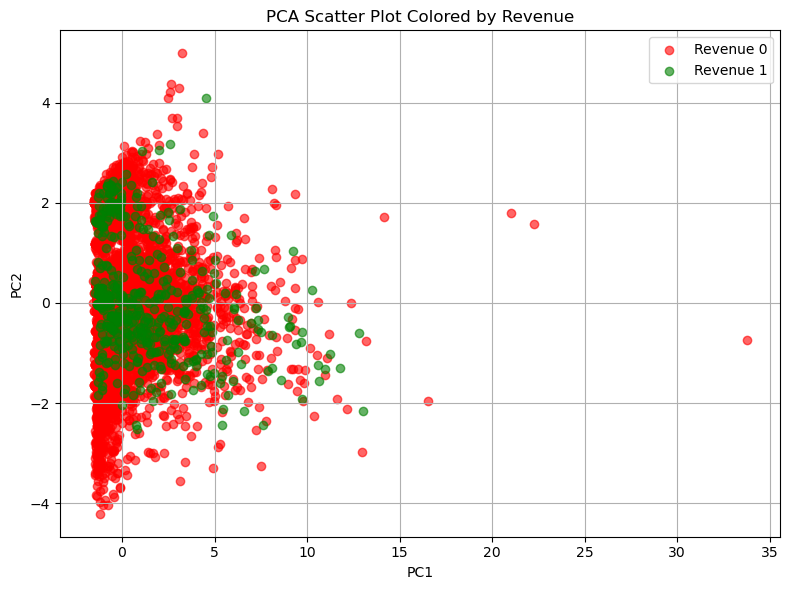

In [31]:
# Scatter plot of PC1 vs PC2, colored by Revenue
plt.figure(figsize=(8, 6))
colors = {0: 'red', 1: 'green'}  # 0 = No Purchase, 1 = Purchase

# Loop through each unique Revenue class (0 = no purchase, 1 = purchase)
for label in pca_df['Revenue'].unique():
    subset = pca_df[pca_df['Revenue'] == label] # Filter rows for the current Revenue class
    plt.scatter(subset['PC1'], subset['PC2'],
                c=colors[label], label=f'Revenue {label}', alpha=0.6)   # Plot PC1 vs PC2 for this class with color and label


plt.xlabel('PC1')  # First principal component
plt.ylabel('PC2')  # Second principal component
plt.title('PCA Scatter Plot Colored by Revenue')
plt.legend() # Add legend and grid for clarity
plt.grid(True)
plt.tight_layout()
plt.show()


<b>- Show explained variance ratio </b>

In [32]:
#  Explained variance ratio for each principal component
for i, var in enumerate(pca.explained_variance_ratio_, 1):
    print(f"PC{i}: {var:.4f}")

PC1: 0.2891
PC2: 0.1139
PC3: 0.0920
PC4: 0.0863
PC5: 0.0815
PC6: 0.0766
PC7: 0.0740
PC8: 0.0627
PC9: 0.0565
PC10: 0.0380


# Day 4: Classification Models (25 marks) 

### 4.1 Model Training and Evaluation 
- Train and evaluate four models using 80/20 train-test split: 

In [33]:
X = df.drop(columns=['Revenue', 'month_in_words', 'VisitorTypeLabel', 'WeekendLabel', 'SessionQuality'])

y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4.1.1 Logistic Regression (6 marks) 

#### Train model and generate predictions

In [34]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred = lg.predict(X_test)

y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Calculate accuracy, precision, recall, F1-score 

In [36]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

Accuracy: 0.9354636591478697
Precision: 0.2857142857142857
Recall: 0.041237113402061855
F1-score: 0.07207207207207207


#### Display confusion matrix 

In [37]:
print('Confusion Matrix:\n' , confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[1489   10]
 [  93    4]]


### 4.1.2 Decision Tree (6 marks) 

<b>- Train with max_depth=10 to prevent overfitting</b>

In [ ]:
dt = DecisionTreeClassifier(max_depth=10, random_state=42)  # Train with max_depth=10 to prevent overfitting
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [39]:
y_pred_dt = dt.predict(X_test)



<b>- Calculate performance metrics </b>

In [40]:
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1-score:", f1_score(y_test, y_pred_dt))

Accuracy: 0.924812030075188
Precision: 0.2909090909090909
Recall: 0.16494845360824742
F1-score: 0.21052631578947367


<b>- Display confusion matrix </b>

In [41]:
print('Confusion Matrix:\n' , confusion_matrix(y_test, y_pred_dt))

Confusion Matrix:
 [[1460   39]
 [  81   16]]


### 4.1.3 Random Forest (6 marks) 

<b>- Train with n_estimators=100, random_state=42 </b>

In [42]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Train with n_estimators=100, random_state=42
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

<b>Calculate performance metrics </b>

In [47]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print()
print('=============Confusion Matrix:=====================\n' , confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.9323308270676691
Precision: 0.2962962962962963
Recall: 0.08247422680412371
F1-score: 0.12903225806451613

=============Confusion Matrix:=====================
 [[1480   19]
 [  89    8]]


<b>Show feature importance plot </b>

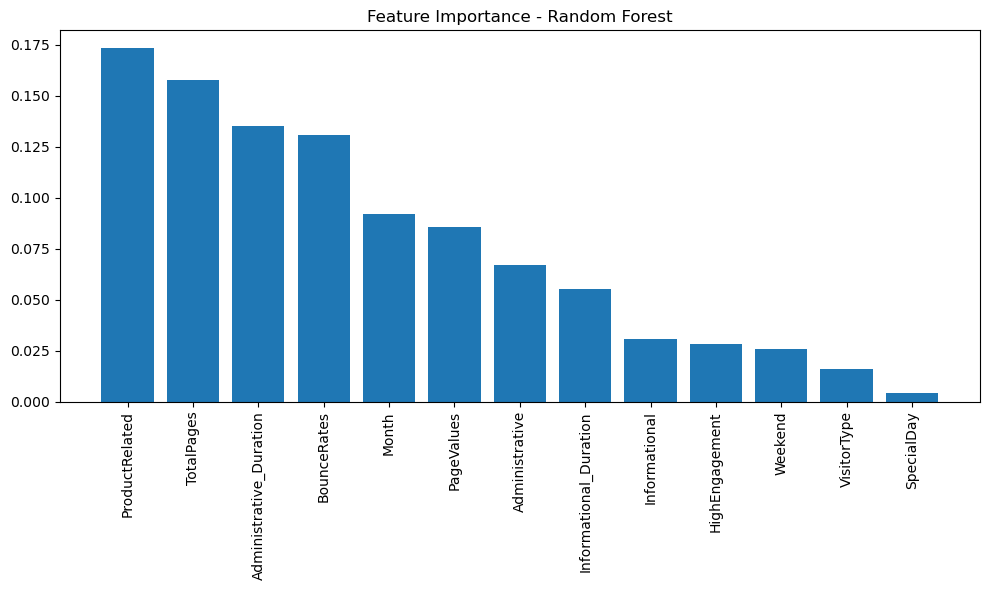

In [49]:
importances = rf.feature_importances_  # Get feature importance scores from trained Random Forest
feature_names = X.columns              # Get original feature names
indices = importances.argsort()[::-1]  # Sort feature indices by importance (descending)

plt.figure(figsize=(10, 6))            
plt.title("Feature Importance - Random Forest") 
plt.bar(range(len(importances)), importances[indices], align='center')  # Plot sorted importances
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)  # Label x-axis with feature names
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()                            

### 4.1.4 Support Vector Machine (7 marks) 

<b> Train SVM with RBF kernel </b>

In [50]:
svm = SVC(kernel='rbf', random_state=42)  # Train SVM with RBF kernel
svm.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
y_pred_svm = svm.predict(X_test)
y_pred_svm

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

<b>Calculate performance metrics </b>

In [52]:
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1-score:", f1_score(y_test, y_pred_svm))

Accuracy: 0.9392230576441103
Precision: 0.0
Recall: 0.0
F1-score: 0.0


c:\Users\sibus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<b>- Display confusion matrix </b>

In [ ]:
print('=============Confusion Matrix:=====================\n' , confusion_matrix(y_test, y_pred_svm))

=============Confusion Matrix:=====================
 [[1499    0]
 [  97    0]]


<b>Compare training time with other models </b>

In [66]:


# Logistic Regression
start_lr = time.time()
lg.fit(X_train, y_train)
lr_time = time.time() - start_lr  # Training time for Logistic Regression

# Decision Tree
start_dt = time.time()
dt.fit(X_train, y_train)
dt_time = time.time() - start_dt  # Training time for Decision Tree

# Random Forest
start_rf = time.time()
rf.fit(X_train, y_train)
rf_time = time.time() - start_rf  # Training time for Random Forest

# Support Vector Machine
start_svm = time.time()
svm.fit(X_train, y_train)  # Use scaled data for SVM
svm_time = time.time() - start_svm  # Training time for SVM

# Display training times
print("Training Time Comparison (in seconds):")
print(f"Logistic Regression: {lr_time:.2f}")
print(f"Decision Tree:       {dt_time:.2f}")
print(f"Random Forest:       {rf_time:.2f}")
print(f"SVM (RBF Kernel):    {svm_time:.2f}")

Training Time Comparison (in seconds):
Logistic Regression: 0.22
Decision Tree:       0.09
Random Forest:       2.47
SVM (RBF Kernel):    2.03


###  Compare training time with other models 

<b>Support Vector Machine (SVM) had the longest training time among the models tested, taking approximately 2.03 to 2.62 seconds. This is due to its computationally intensive RBF kernel, which performs complex transformations and optimizations. Random Forest was similarly slow, around 2.47 to 2.50 seconds, because it trains multiple decision trees in parallel. In contrast, Logistic Regression and Decision Tree were significantly faster, completing training in under 0.25 seconds. These models are simpler and require less computation, making them more efficient for quick training </b>